In [ ]:
!unzip /content/drive/MyDrive/C-NMC_Leukemia.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import math
import shutil
import tqdm
import skimage.io
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

import keras
import glob
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from keras.preprocessing import image

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
ROOT_DIR = '/content/C-NMC_Leukemia/training_data/C-NMC_train_phase_data'

In [ ]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('2.all', 7272), ('1.hem', 3389)])

In [ ]:
def datafolder(p, split):
    if not os.path.exists("./"+p):
      os.mkdir("./"+p)

      for dir in os.listdir(ROOT_DIR):
        os.makedirs("./"+p+"/"+dir)

        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) , size = (math.floor(split*number_of_images[dir])-5), replace=False ):

          O = os.path.join(ROOT_DIR, dir, img)
          D = os.path.join("./"+p, dir)
          shutil.copy(O,D)
          os.remove(O)
    else:
      print(f"{p}Train Folder exist")

In [ ]:
datafolder("train", 0.60)

In [ ]:
datafolder("val", 0.20)

In [ ]:
datafolder("test", 0.20)

In [ ]:
#data_augmentation
train_datagen = image.ImageDataGenerator(
    rescale = 1/255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2, shear_range = 0.2
)

train_data = train_datagen.flow_from_directory(directory=("/content/train"), target_size= (256,256), batch_size= 32, class_mode = 'binary')

Found 6386 images belonging to 2 classes.


In [ ]:

val_datagen = image.ImageDataGenerator(
    rescale = 1/255
)

val_data = val_datagen.flow_from_directory(directory=("/content/val"), target_size= (256,256), batch_size= 32, class_mode = 'binary')

Found 2121 images belonging to 2 classes.


In [ ]:

test_datagen = image.ImageDataGenerator(
    rescale = 1/255
)

test_data = test_datagen.flow_from_directory(directory=("/content/test"), target_size= (256,256), batch_size= 32, class_mode = 'binary')

Found 2121 images belonging to 2 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters= 32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))



model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate=0.25))


model.add(Dense(units= 1, activation='sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0

In [ ]:
# Defining callbacks

filepath = './bestmodel.h5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 6)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [ ]:
res = model.fit_generator(train_data, steps_per_epoch=16, epochs=15, validation_steps= 2,
                    validation_data = val_data,
                    callbacks = callback_list
                    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.7771
Epoch 00001: val_accuracy improved from -inf to 0.82812, saving model to ./bestmodel.h5
16/16 [==============================] - 11s 684ms/step - loss: 0.5061 - accuracy: 0.7771 - val_loss: 0.5645 - val_accuracy: 0.8281
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.7520
Epoch 00002: val_accuracy did not improve from 0.82812
16/16 [==============================] - 10s 624ms/step - loss: 0.5244 - accuracy: 0.7520 - val_loss: 0.4809 - val_accuracy: 0.7969
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.7631
Epoch 00003: val_accuracy did not improve from 0.82812
16/16 [==============================] - 10s 597ms/step - loss: 0.5211 - accuracy: 0.7631 - val_loss: 0.5487 - val_accuracy: 0.7969
Epoch 4/15
16/16 [==============================] - ETA: 0s - loss: 0.5407 - accuracy: 0.7578
Epoch 00004: val_accuracy did 

In [ ]:
#model graphical view

his = res.history
his.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

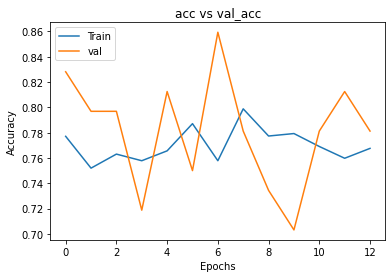

In [ ]:
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'] )

plt.title('acc vs val_acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")
plt.show

<function matplotlib.pyplot.show>

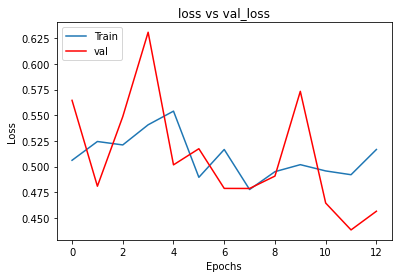

In [ ]:
plt.plot(his['loss'])
plt.plot(his['val_loss'], c ='red')

plt.title('loss vs val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show

In [ ]:
#model accuracy

from keras.models import load_model

model = load_model('/content/bestmodel.h5')

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


0.7958509922027588
